Exp 4 : Unsupervised Learning

Clustering

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
df = datasets.load_iris()
y = df.target
yframe=pd.DataFrame(y)
dfr = pd.DataFrame(data=df.data, 
                  columns=df.feature_names)
dfr["target"] = yframe
dfr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


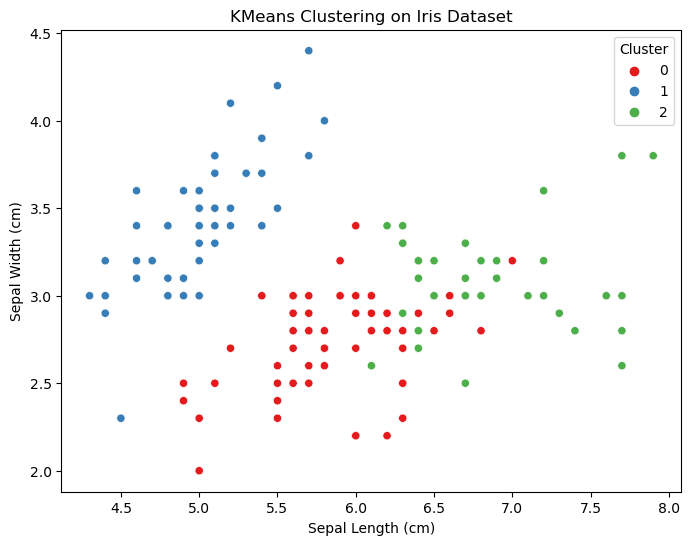

Cluster Centers:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

# Selecting the features for clustering
X = df[
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
]

# Fit the KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)
df["kmeans_labels"] = kmeans_model.fit_predict(X)

# Visualizing the clustering (using sepal length and sepal width for 2D plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="kmeans_labels",
    palette="Set1",
)
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Cluster")
plt.show()

# Optionally, display the cluster centers
print("Cluster Centers:")
print(kmeans_model.cluster_centers_)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


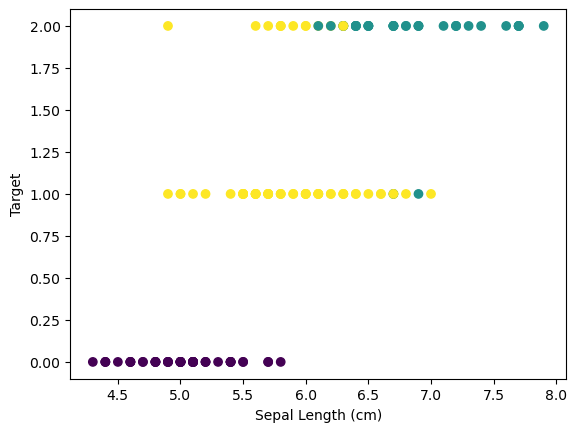

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming dfr is the DataFrame with the columns: 'sepal length (cm)', 'target', and others

# Use only the feature columns for clustering, excluding 'target'
X = dfr[
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
]

# Create KMeans model with 3 clusters
kmeans_model = KMeans(n_clusters=3)

# Fit the model
y_kmeans = kmeans_model.fit(X)

# Add the cluster labels to the dataframe
dfr["kmeans_3"] = kmeans_model.labels_

# Plot the results
plt.scatter(x=dfr["sepal length (cm)"], y=dfr["target"], c=dfr["kmeans_3"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Target")
plt.show()

In [5]:
#Intrinsic Method
from sklearn.metrics import silhouette_score
silhouette_score(dfr[['sepal length (cm)','target']], dfr['kmeans_3'], metric = 'euclidean')

0.5023615539680513

In [6]:
#Adjusted Rand Index
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df['target'], dfr['kmeans_3'])

0.7302382722834697

In [7]:
#Mutual Information
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(df['target'], dfr['kmeans_3'])

0.7581756800057784